1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [1]:
# DONE

import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

N = 1000
x_1 = np.random.normal(loc=0.0, scale=1.0, size=N)
x_2 = x_1 + np.random.normal(loc=0.0, scale=3.0, size=N) 
x_3 = 2*x_1 + x_2

X = np.array([x_1, x_2, x_3])

# covariance matrices
cov_X = np.cov(X)

# eigenvectors and eigenvalues of the covariance matrix
l, V = la.eig(cov_X)

# take only the real component
l = np.real_if_close(l)

print("Method 1: eigendecomposition of the covariance matrix.", '\n')
print("Eigenvalues with Eigendecomposition:\n", l, '\n')
print("Eigenvectors with Eigendecomposition:\n", V, '\n')

Method 1: eigendecomposition of the covariance matrix. 

Eigenvalues with Eigendecomposition:
 [ 2.44208985e+01 -1.54615350e-15  1.89126709e+00] 

Eigenvectors with Eigendecomposition:
 [[-0.11873568 -0.81649658  0.565009  ]
 [-0.5732562  -0.40824829 -0.71042992]
 [-0.81072756  0.40824829  0.41958809]] 



In [2]:
# Perform SVD decomposition on the dataset
U, S, Vt = np.linalg.svd(X)

# Rescale the SVD spectrum to get the eigenvalues
l_svd = S**2/(N-1)

# The matrix U already contains the eigenvectors
V_svd = U

print("Method 2: SVD.", "\n")
print("Eigenvalues with Eigendecomposition:\n", l_svd, '\n')
print("Eigenvectors with Eigendecomposition:\n", V_svd, '\n')

print("The two procedures yield to the same eigenvectors and eigenvalues given a certain tolerance in terms of precision due to the computations.")


Method 2: SVD. 

Eigenvalues with Eigendecomposition:
 [2.44301294e+01 1.89286378e+00 4.85289878e-31] 

Eigenvectors with Eigendecomposition:
 [[-0.11863942  0.56502922 -0.81649658]
 [-0.57337723 -0.71033224 -0.40824829]
 [-0.81065606  0.41972621  0.40824829]] 

The two procedures yield to the same eigenvectors and eigenvalues given a certain tolerance in terms of precision due to the computations.


In [3]:
# What percent of the total dataset's variability is explained by the principal components?
# Given how the dataset was constructed, do these make sense?
# Reduce the dimensionality of the system so that at least 99% of the total variability is retained

l, V = np.linalg.eig(cov_X)
Lambda = np.diag(l)
print("Lambda:\n", Lambda, '\n')
print("Trace(A):\n", cov_X.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')

p_pca = ((Lambda[0, 0]+Lambda[2, 2])/(Lambda.trace()))

print("The percent of dataset's variability explained by the principal components 1 and 3 is ", p_pca*100, " %")
print("It makes sense as we have that the component 3 is a linear combination of the other two components")

Lambda:
 [[ 2.44208985e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.54615350e-15  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.89126709e+00]] 

Trace(A):
 26.31216560567888 

Trace(Lambda):
 26.3121656056789 

The percent of dataset's variability explained by the principal components 1 and 3 is  100.0  %
It makes sense as we have that the component 3 is a linear combination of the other two components


(-6.0, 6.0)

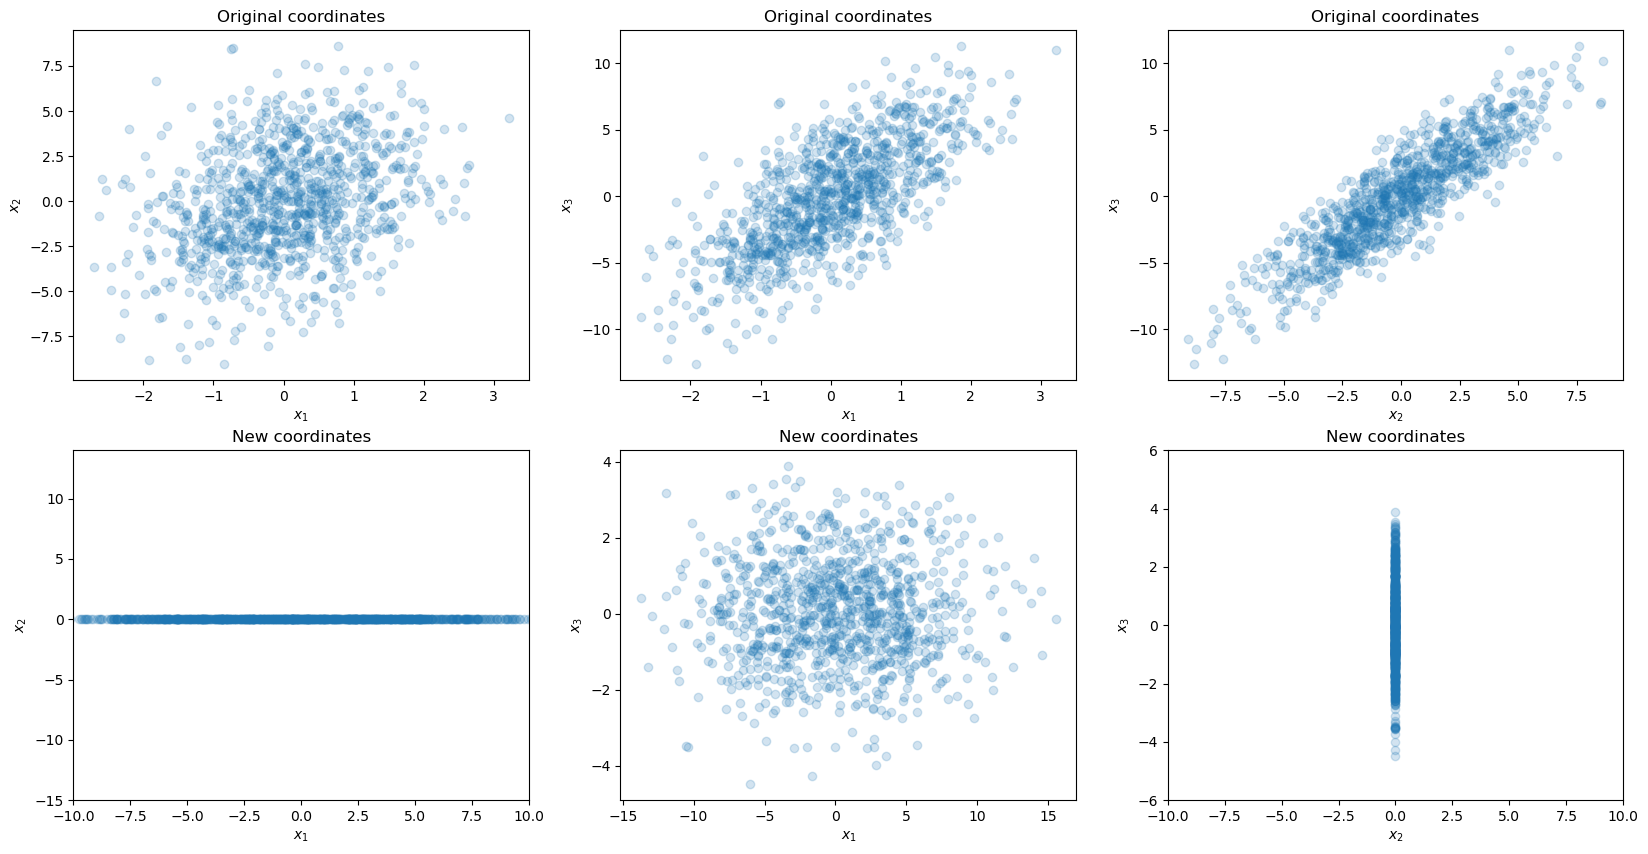

In [4]:
# redefine the data according to the new basis from the PCA
X_new = np.dot(V.T, X)

# Plot the data, in both the original and the new basis.
# The figure should have 2 rows (the original and the new basis)
# and 3 columns (the  [𝑥0,𝑥1] ,  [𝑥0,𝑥2]  and  [𝑥1,𝑥2]  projections) of scatter plots.

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

axes[0,0].scatter(X[0,:], X[1,:], alpha=0.2)
axes[0,0].set_xlabel("$x_{1}$")
axes[0,0].set_ylabel("$x_{2}$")
axes[0,0].set_title("Original coordinates")

axes[0,1].scatter(X[0,:], X[2,:], alpha=0.2)
axes[0,1].set_xlabel("$x_{1}$")
axes[0,1].set_ylabel("$x_{3}$")
axes[0,1].set_title("Original coordinates")

axes[0,2].scatter(X[1,:], X[2,:], alpha=0.2)
axes[0,2].set_xlabel("$x_{2}$")
axes[0,2].set_ylabel("$x_{3}$")
axes[0,2].set_title("Original coordinates")

axes[1,0].scatter(X_new[0,:], X_new[1,:], alpha=0.2)
axes[1,0].set_xlabel("$x_{1}$")
axes[1,0].set_ylabel("$x_{2}$")
axes[1,0].set_title("New coordinates")
axes[1,0].set_xlim([-15, 15])
axes[1,0].set_ylim([-9, 10])

axes[1,1].scatter(X_new[0,:], X_new[2,:], alpha=0.2)
axes[1,1].set_xlabel("$x_{1}$")
axes[1,1].set_ylabel("$x_{3}$")
axes[1,1].set_title("New coordinates")
axes[1,0].set_xlim([-10, 10])
axes[1,0].set_ylim([-15, 14])

axes[1,2].scatter(X_new[1,:], X_new[2,:], alpha=0.2)
axes[1,2].set_xlabel("$x_{2}$")
axes[1,2].set_ylabel("$x_{3}$")
axes[1,2].set_title("New coordinates")
axes[1,2].set_xlim([-10, 10])
axes[1,2].set_ylim([-6, 6])

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [5]:
# DONE

N = 1000
x_1 = np.random.normal(loc=0.0, scale=1.0, size=N)
x_2 = x_1 + np.random.normal(loc=0.0, scale=3.0, size=N) 
x_3 = 2*x_1 + x_2

noise_sigma = [np.abs(np.random.normal(loc=0.0, scale=0.2)) for i in range(0,10)] # standard deviation
print(noise_sigma)
for sig in noise_sigma:
    x_1 += np.random.normal(0, sig, N)
    x_2 += np.random.normal(0, sig, N)
    x_3 += np.random.normal(0, sig, N)
    
X_noise = np.array([x_1, x_2, x_3])
X_noise

# covariance matrices
cov_X = np.cov(X_noise)

# eigenvectors and eigenvalues of the covariance matrix
l, V = la.eig(cov_X)

# take only the real component
l = np.real_if_close(l)

print("Eigenvalues with Eigendecomposition:\n", l, '\n')
print("Eigenvectors with Eigendecomposition:\n", V, '\n')

[0.056819249629732366, 0.13602156093163906, 0.017613124911198836, 0.012659282258955105, 0.17302392413683124, 0.1589185670029817, 0.014339046476282766, 0.0013127209326696165, 0.1306461881104441, 0.21970658140573573]
Eigenvalues with Eigendecomposition:
 [26.36789327  0.14935764  2.03790608] 

Eigenvectors with Eigendecomposition:
 [[-0.11742986 -0.81875903  0.56199989]
 [-0.57600311 -0.40484227 -0.71015713]
 [-0.80896888  0.40710734  0.42406718]] 



In [6]:
# Perform SVD decomposition on the dataset
U, S, Vt = np.linalg.svd(X_noise)

# Rescale the SVD spectrum to get the eigenvalues
l_svd = S**2/(N-1)

# The matrix U already contains the eigenvectors
V_svd = U

print("Eigenvalues with Eigendecomposition:\n", l_svd, '\n')
print("Eigenvectors with Eigendecomposition:\n", V_svd, '\n')

Eigenvalues with Eigendecomposition:
 [26.42645366  2.03792792  0.15018191] 

Eigenvectors with Eigendecomposition:
 [[-0.11723922  0.56193625 -0.81883003]
 [-0.57586296 -0.71021265 -0.40494425]
 [-0.80909629  0.42405854  0.40686305]] 



In [7]:
# What percent of the total dataset's variability is explained by the principal components?
# Given how the dataset was constructed, do these make sense?
# Reduce the dimensionality of the system so that at least 99% of the total variability is retained

l, V = np.linalg.eig(cov_X)
Lambda = np.diag(l)
print("Lambda:\n", Lambda, '\n')
print("Trace(A):\n", cov_X.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')

p_pca = ((Lambda[0, 0]+Lambda[2, 2])/(Lambda.trace()))

print(f"The percent of dataset's variability explained by the principal components 1 and 3 is ", p_pca*100, " %")
print("It makes sense as we have that the component 1 is a linear combination of the other two components")

Lambda:
 [[26.36789327  0.          0.        ]
 [ 0.          0.14935764  0.        ]
 [ 0.          0.          2.03790608]] 

Trace(A):
 28.555156983149203 

Trace(Lambda):
 28.555156983149203 

The percent of dataset's variability explained by the principal components 1 and 3 is  99.47695038805954  %
It makes sense as we have that the component 1 is a linear combination of the other two components


3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [8]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [9]:
# DONE

import csv
import pandas as pd
import numpy as np

data = pd.read_csv("data/magic04.data")
data = pd.DataFrame(data)
print(data)

data = data.drop('g', axis=1) # remove the last column because there are letters

# PCA
l, V = np.linalg.eig(np.cov(data.T))
l = np.real_if_close(l)
print("\tEigenvalues are: ", l)

l_var = []

for e in l:
    l_var.append(100*(e.real)/np.sum(l.real))

print("\tThe percent of dataset's variability explained by the principal components is respectively ", l_var, "%")

        28.7967   16.0021  2.6449  0.3918  0.1982   27.7004    22.011  \
0       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
1      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
2       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
3       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
4       51.6240   21.1502  2.9085  0.2420  0.1340   50.8761   43.1887   
...         ...       ...     ...     ...     ...       ...       ...   
19014   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19015   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19016   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19017  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19018  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       -8.2027   40.092   81.8828  g  
0      -9.9574   6.3609  205.2610  g  
1     -45.2160  76.9600  256.7880  g  
2     